# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip
import matplotlib.pyplot as plt


In [2]:
! pip install openpyxl

In [3]:
# Importation du fichier histo_immo.xlsx
df_hist_immo = pd.read_excel("historique_immobilier_paris_2017_2021_vdef2.xlsx")
# Afficher les premières lignes du DataFrame
df_hist_immo.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [4]:
#On vérifie que le type des données attribué par pandas est cohérent
type_donnees_hist_immo=df_hist_immo.dtypes
print(type_donnees_hist_immo)

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object


#Le type de date n'est pas au bon format

In [5]:
##  verifier s'il ya des données manquantes
df_hist_immo.isnull().sum()

date_mutation       0
valeur_fonciere     0
adresse_numero      0
adresse_nom_voie    0
code_postal         0
nom_commune         0
code_type_local     0
type_local          0
surface_reelle      0
dtype: int64

### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [6]:

valeurs_uniques = df_hist_immo['type_local'].unique().tolist()
print('la liste des différents types de biens immobiliers que nous avons dans les données est ?:')
for valeur in valeurs_uniques:
    print(valeur)


la liste des différents types de biens immobiliers que nous avons dans les données est ?:
Appartement
Local industriel. commercial ou assimilé


In [7]:
valeurs_uniques_1 = df_hist_immo['code_type_local'].unique().tolist()
print('la liste des différents codes types de biens immobiliers que nous avons dans les données est ?:')
for valeur_1 in valeurs_uniques_1:
    print(valeur_1)

la liste des différents codes types de biens immobiliers que nous avons dans les données est ?:
2
4


On observe qu'il y a 2 types de biens, et que leurs codes types sont 2 et 4 . 

### 3. Nombre de transactions

In [8]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
nombre_transactions = df_hist_immo.shape[0]
print("Nombre total de transactions immo_parisiens : ", nombre_transactions)


Nombre total de transactions immo_parisiens :  26196


In [9]:
# Filtrer les données pour un type de local spécifique, 
appartements_1 = df_hist_immo[df_hist_immo['type_local'] == 'Appartement'].copy()

# Compter le nombre de transactions pour les appartements
nombre_transactions_appartements = appartements_1.shape[0]
print("Nombre total de transactions d'appartements immo_parisiens : ", nombre_transactions_appartements)

Nombre total de transactions d'appartements immo_parisiens :  24353


In [10]:
# Filtrer les données pour un type de local spécifique,
locaux_industriels = df_hist_immo[df_hist_immo['type_local'] == 'Local industriel. commercial ou assimilé']
# Compter le nombre de transactions pour les locaux commerciaux
nombre_transactions_locaux_industriels = locaux_industriels.shape[0]
print("Nombre total de transactions de locaux commerciaux immo_parisens : ", nombre_transactions_locaux_industriels)


Nombre total de transactions de locaux commerciaux immo_parisens :  1843


4. interval de l'historique des données

In [11]:
#On vérifie également la plage de l'historique disponible

# Convertir la colonne des dates en format de date
df_hist_immo['date_mutation'] = pd.to_datetime(df_hist_immo['date_mutation'])

# Trouver la première date de transaction
premiere_date = df_hist_immo['date_mutation'].min()

# Trouver la dernière date de transaction
derniere_date = df_hist_immo['date_mutation'].max()

print("la première date de transaction dans les données : ", premiere_date)
print("la dernière date de transaction dans les données : ", derniere_date)



la première date de transaction dans les données :  2017-01-02 00:00:00
la dernière date de transaction dans les données :  2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [12]:
# Calcul de la colonne
## Créer une nouvelle colonne "prix_par_metre_carre"
df_hist_immo['prix_par_metre_carre'] = df_hist_immo['valeur_fonciere'] / df_hist_immo['surface_reelle']

# Afficher le DataFrame avec la nouvelle colonne
df_hist_immo.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_par_metre_carre
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.113836


In [13]:
print(df_hist_immo.columns)

Index(['date_mutation', 'valeur_fonciere', 'adresse_numero',
       'adresse_nom_voie', 'code_postal', 'nom_commune', 'code_type_local',
       'type_local', 'surface_reelle', 'prix_par_metre_carre'],
      dtype='object')


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [14]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_hist_immo_ss = df_hist_immo.drop(['adresse_numero', 'adresse_nom_voie', 'nom_commune', 'code_type_local'], axis=1)
df_hist_immo_ss.head()

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_par_metre_carre
0,2017-01-03,5.505597e+05,75003,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,75008,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,75008,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,75003,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,75001,Appartement,15,11751.113836


In [15]:
# filtrer les appartements

df_hist_immo_Appart=df_hist_immo_ss.loc[df_hist_immo_ss['type_local'] == 'Appartement', :]

df_hist_immo_Appart.head()

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_par_metre_carre
0,2017-01-03,5.505597e+05,75003,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,75008,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,75008,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,75003,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,75001,Appartement,15,11751.113836


In [16]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne 

##Extrayez l'année à partir de la colonne 'date_de_mutation'
df_hist_immo_Appart['annee'] = df_hist_immo_Appart['date_mutation'].dt.year
df_hist_immo_Appart.head()

C:\Users\33666\AppData\Local\Temp\ipykernel_123808\825160198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist_immo_Appart['annee'] = df_hist_immo_Appart['date_mutation'].dt.year


,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_par_metre_carre,annee
0,2017-01-03,5.505597e+05,75003,Appartement,50,11011.193562,2017
1,2017-01-12,1.576492e+06,75008,Appartement,163,9671.732877,2017
2,2017-01-10,6.577574e+05,75008,Appartement,66,9966.020548,2017
3,2017-01-10,2.500868e+05,75003,Appartement,22,11367.582877,2017
4,2017-01-13,1.762667e+05,75001,Appartement,15,11751.113836,2017


In [17]:
## Groupez les données par année et calculez les prix moyens et la surface moyenne
resultats = df_hist_immo_Appart.groupby('annee').agg({'prix_par_metre_carre': 'mean', 'surface_reelle': 'mean'})

print(resultats)

       prix_par_metre_carre  surface_reelle
annee                                      
2017            9492.859195       44.627737
2018           10031.403432       44.271671
2019           10562.712581       43.361645
2020           10674.872650       42.900654
2021           10455.600126       43.479864


In [18]:
# Renommez les colonnes pour plus de clarté
resultats = resultats.rename(columns={'prix_par_metre_carre': 'prix_moyen', 'surface_reelle': 'surface_moyenne'})
# Réinitialisez l'index
resultats = resultats.reset_index()

# Affichez le DataFrame résultant
print(resultats)


   annee    prix_moyen  surface_moyenne
0   2017   9492.859195        44.627737
1   2018  10031.403432        44.271671
2   2019  10562.712581        43.361645
3   2020  10674.872650        42.900654
4   2021  10455.600126        43.479864


On constate sur la moyenne des prix de vente des appartements à Paris qu'elle ont augmenté au fil des années mais sur l'année 2021 le prix de vente a légèrement baissé. 
Nous allons créer un graphique pour mieux le visualiser.

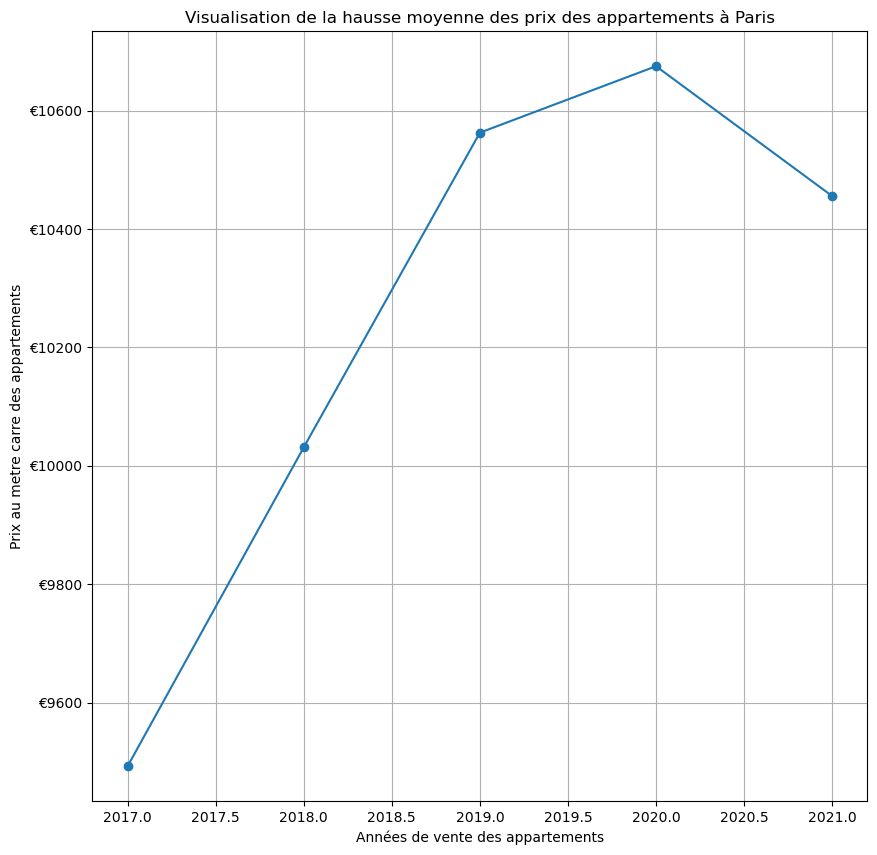

In [19]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,10))

plt.plot(resultats ['annee'], resultats ['prix_moyen'], marker='o', linestyle='-')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des appartements à Paris')
plt.savefig("figure_a.jpeg")
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [20]:
#Liste des codes postaux dans nos données.
codes_postaux_uniques = df_hist_immo_Appart['code_postal'].unique()

codes_postaux_uniques

array([75003, 75008, 75001, 75006, 75005, 75007, 75010, 75009, 75011,
       75012, 75013, 75014, 75015, 75016, 75017, 75018, 75020, 75019,
       75004, 75002], dtype=int64)

In [21]:
codes_postaux_uniques.sort()
codes_postaux_uniques

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020], dtype=int64)

In [22]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement

## Convertir la colonne 'code_postal' en type chaîne de caractères
df_hist_immo_Appart['code_postal'] = df_hist_immo_Appart['code_postal'].astype(str)

##Extraire l'arrondissement à partir des codes postaux
df_hist_immo_Appart['arrondissement'] = df_hist_immo_Appart['code_postal'].str.extract(r'(\d{5})')
df_hist_immo_Appart.head()

C:\Users\33666\AppData\Local\Temp\ipykernel_123808\1849069597.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist_immo_Appart['code_postal'] = df_hist_immo_Appart['code_postal'].astype(str)
C:\Users\33666\AppData\Local\Temp\ipykernel_123808\1849069597.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist_immo_Appart['arrondissement'] = df_hist_immo_Appart['code_postal'].str.extract(r'(\d{5})')


,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_par_metre_carre,annee,arrondissement
0,2017-01-03,5.505597e+05,75003,Appartement,50,11011.193562,2017,75003
1,2017-01-12,1.576492e+06,75008,Appartement,163,9671.732877,2017,75008
2,2017-01-10,6.577574e+05,75008,Appartement,66,9966.020548,2017,75008
3,2017-01-10,2.500868e+05,75003,Appartement,22,11367.582877,2017,75003
4,2017-01-13,1.762667e+05,75001,Appartement,15,11751.113836,2017,75001


In [23]:
## Groupez les données par arrondissement et année, puis calculez les prix moyens

#resultats_arrondissement = df_hist_immo_Appart.groupby(['arrondissement', df_hist_immo_Appart['date_mutation'].dt.year])['valeur_fonciere'].mean().reset_index()
resultats_arrondissement = df_hist_immo_Appart.groupby(['arrondissement', df_hist_immo_Appart['date_mutation'].dt.year])['prix_par_metre_carre'].mean().reset_index()
resultats_arrondissement.head()

,arrondissement,date_mutation,prix_par_metre_carre
0,75001,2017,11762.706289
1,75001,2018,12621.226146
2,75001,2019,13269.256149
3,75001,2020,13405.991820
4,75001,2021,13379.498578


In [24]:
# Renommez la colonne 'valeur_fonciere' en 'prix_moyen'
resultats_arrondissement = resultats_arrondissement.rename(columns={'prix_par_metre_carre': 'prix_moyen', 'date_mutation': 'annee'})

# Affichez le DataFrame résultant
resultats_arrondissement

,arrondissement,annee,prix_moyen
0,75001,2017,11762.706289
1,75001,2018,12621.226146
2,75001,2019,13269.256149
3,75001,2020,13405.991820
4,75001,2021,13379.498578
...,...,...,...
95,75020,2017,7886.023336
96,75020,2018,8485.162808
97,75020,2019,9093.992492
98,75020,2020,9329.305302


In [25]:
# Filtrer les données pour le premier arrondissement
arrondissement_1 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75001']
print(arrondissement_1)

  arrondissement  annee    prix_moyen
0          75001   2017  11762.706289
1          75001   2018  12621.226146
2          75001   2019  13269.256149
3          75001   2020  13405.991820
4          75001   2021  13379.498578


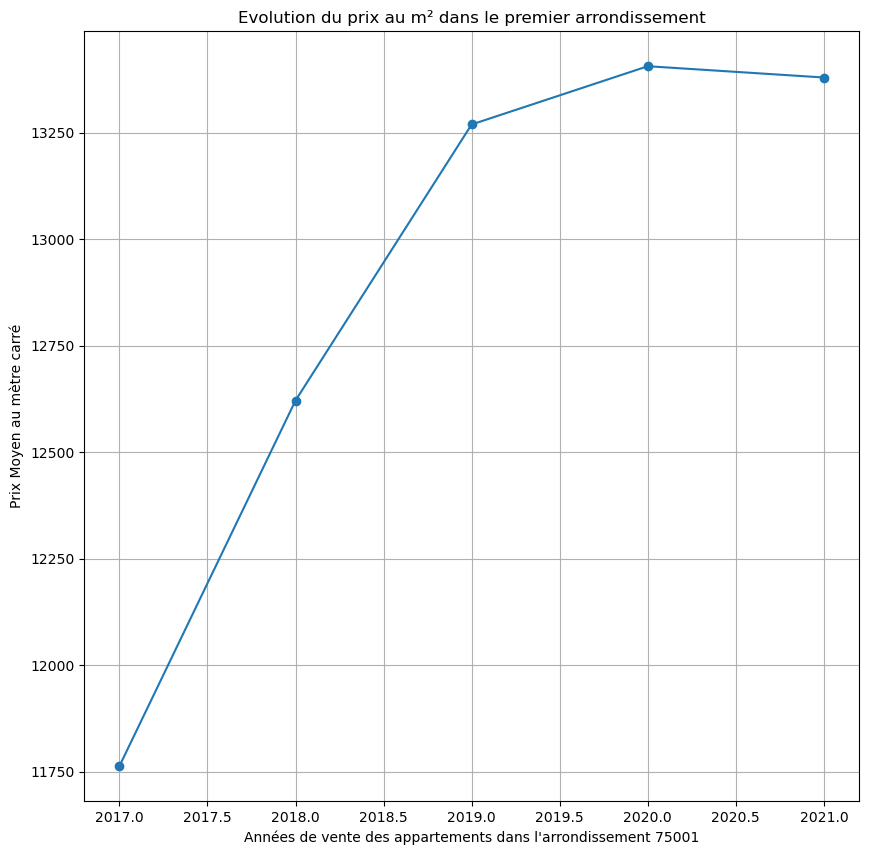

In [26]:

# Créer un graphique pour la hausse de la moyenne des prix au mètre carré
plt.figure(figsize=(10, 10))
plt.plot(arrondissement_1['annee'], arrondissement_1['prix_moyen'], marker='o', linestyle='-')
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.xlabel("Années de vente des appartements dans l'arrondissement 75001")
plt.ylabel('Prix Moyen au mètre carré')

plt.grid(True)
plt.savefig("figure_1.jpeg")

# Afficher le graphique
plt.show()



Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

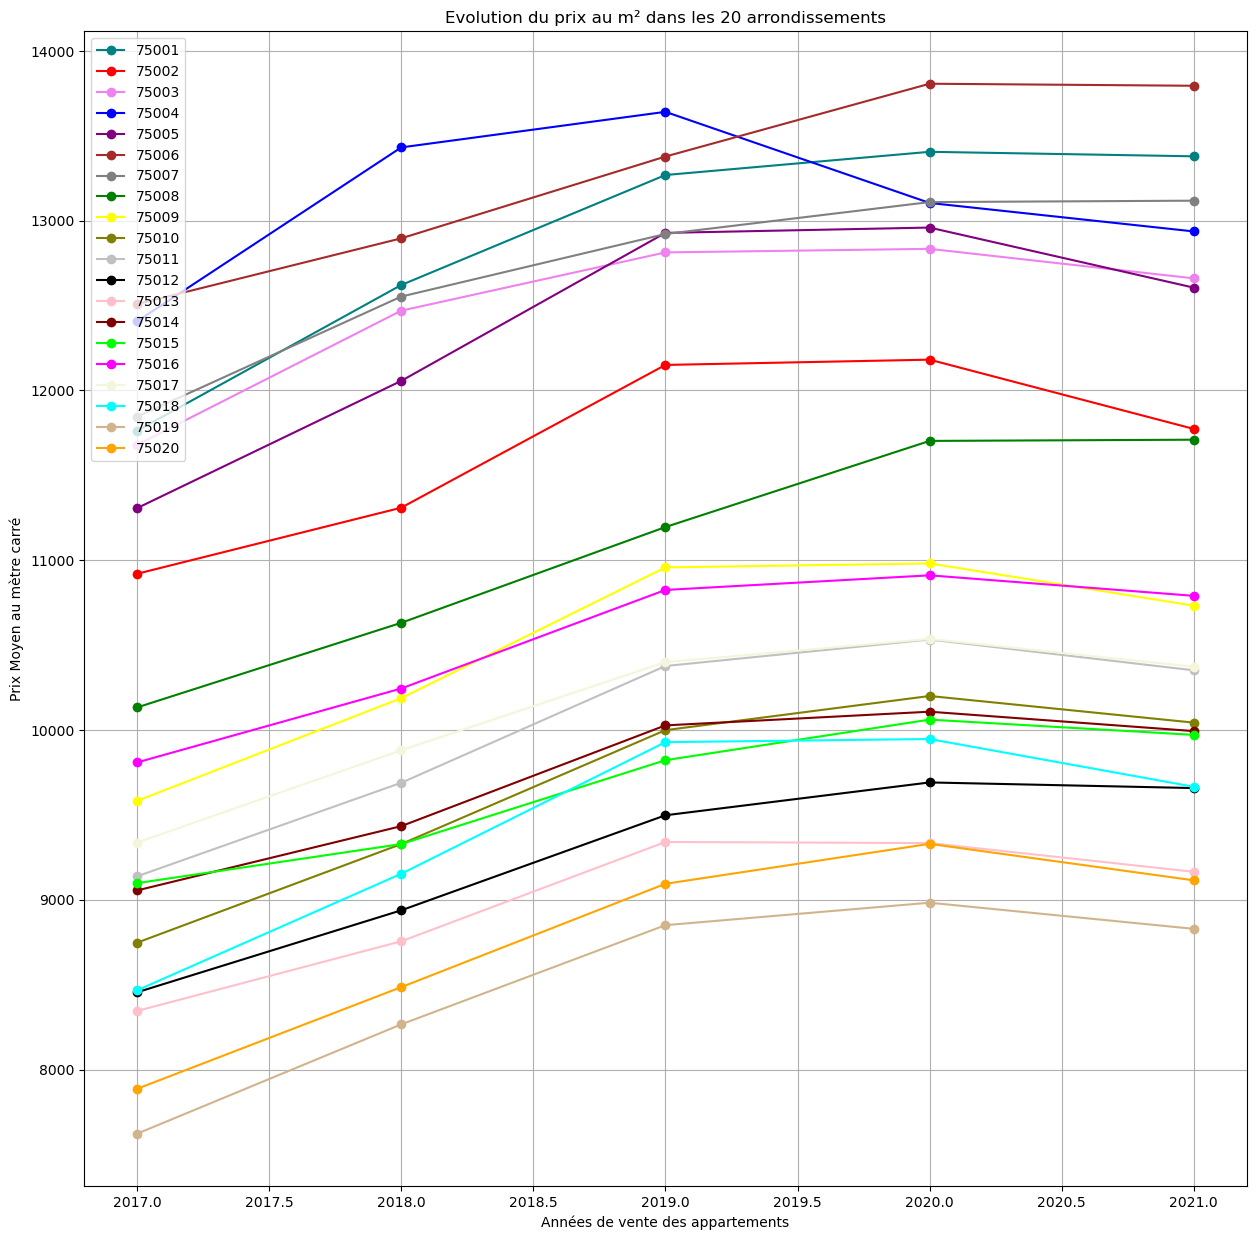

In [27]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(15,15))
interval_historique=['2017','2018','2019','2020','2021']
#Insérer les lignes à tracer ci-dessous


arrondissement_1 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75001']
arrondissement_2 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75002']
arrondissement_3 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75003']
arrondissement_4 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75004']
arrondissement_5 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75005']
arrondissement_6 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75006']
arrondissement_7 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75007']
arrondissement_8 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75008']
arrondissement_9 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75009']
arrondissement_10 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75010']
arrondissement_11 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75011']
arrondissement_12 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75012']
arrondissement_13 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75013']
arrondissement_14 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75014']
arrondissement_15 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75015']
arrondissement_16 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75016']
arrondissement_17 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75017']
arrondissement_18 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75018']
arrondissement_19 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75019']
arrondissement_20 = resultats_arrondissement[resultats_arrondissement['arrondissement'] == '75020']
plt.plot(arrondissement_1['annee'], arrondissement_1['prix_moyen'], marker='o', linestyle='-', color='teal',label='75001')
plt.plot(arrondissement_2['annee'], arrondissement_2['prix_moyen'], marker='o', linestyle='-', color='red',label='75002')
plt.plot(arrondissement_3['annee'], arrondissement_3['prix_moyen'], marker='o', linestyle='-', color='violet',label='75003')
plt.plot(arrondissement_4['annee'], arrondissement_4['prix_moyen'], marker='o', linestyle='-', color='blue',label='75004')
plt.plot(arrondissement_5['annee'], arrondissement_5['prix_moyen'], marker='o', linestyle='-', color='purple',label='75005')
plt.plot(arrondissement_6['annee'], arrondissement_6['prix_moyen'], marker='o', linestyle='-', color='brown',label='75006')
plt.plot(arrondissement_7['annee'], arrondissement_7['prix_moyen'], marker='o', linestyle='-', color='gray',label='75007')
plt.plot(arrondissement_8['annee'], arrondissement_8['prix_moyen'], marker='o', linestyle='-', color='green',label='75008')
plt.plot(arrondissement_9['annee'], arrondissement_9['prix_moyen'], marker='o', linestyle='-', color='yellow',label='75009')
plt.plot(arrondissement_10['annee'], arrondissement_10['prix_moyen'], marker='o', linestyle='-', color='olive',label='75010')
plt.plot(arrondissement_11['annee'], arrondissement_11['prix_moyen'], marker='o', linestyle='-', color='silver',label='75011')
plt.plot(arrondissement_12['annee'], arrondissement_12['prix_moyen'], marker='o', linestyle='-', color='black',label='75012')
plt.plot(arrondissement_13['annee'], arrondissement_13['prix_moyen'], marker='o', linestyle='-', color='pink',label='75013')
plt.plot(arrondissement_14['annee'], arrondissement_14['prix_moyen'], marker='o', linestyle='-', color='maroon',label='75014')
plt.plot(arrondissement_15['annee'], arrondissement_15['prix_moyen'], marker='o', linestyle='-', color='lime',label='75015')
plt.plot(arrondissement_16['annee'], arrondissement_16['prix_moyen'], marker='o', linestyle='-', color='magenta',label='75016')
plt.plot(arrondissement_17['annee'], arrondissement_17['prix_moyen'], marker='o', linestyle='-', color='beige',label='75017')
plt.plot(arrondissement_18['annee'], arrondissement_18['prix_moyen'], marker='o', linestyle='-', color='cyan',label='75018')
plt.plot(arrondissement_19['annee'], arrondissement_19['prix_moyen'], marker='o', linestyle='-', color='tan',label='75019')
plt.plot(arrondissement_20['annee'], arrondissement_20['prix_moyen'], marker='o', linestyle='-', color='orange',label='75020')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix Moyen au mètre carré')

plt.grid(True)
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()












On observe que globalement, les prix de l'immobilier varient d'un arrondissement à l'autre et augmentent au fil des années avec un leger ralentissement dès 2019 et en 2020, on constate même une legère baisse

### 7. Prix au metre carré par transaction dans un arrondissement

In [28]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé

## Filtrer les données pour le 6ème arrondissement

df_arrondissement6=df_hist_immo_Appart.loc[df_hist_immo_Appart['code_postal'] == '75006', :]

df_arrondissement6.head()

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_par_metre_carre,annee,arrondissement
478,2017-01-10,9.601314e+05,75006,Appartement,78,12309.376712,2017,75006
482,2017-01-13,8.204362e+05,75006,Appartement,68,12065.237671,2017,75006
484,2017-01-13,1.796112e+06,75006,Appartement,143,12560.221781,2017,75006
488,2017-01-17,2.488198e+05,75006,Appartement,20,12440.991370,2017,75006
491,2017-01-19,4.828724e+05,75006,Appartement,40,12071.808904,2017,75006


In [29]:
# Compter le nombre de transactions dans le 6ème arrondissement
nombre_transactions_6 = len(df_arrondissement6)

## Afficher le nombre de transactions
print(f"Nombre de transactions dans le 6ème arrondissement : {nombre_transactions_6}")

Nombre de transactions dans le 6ème arrondissement : 709


In [30]:
## Afficher le DataFrame pour le 6ème arrondissement

df_arrondissement6.head()

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_par_metre_carre,annee,arrondissement
478,2017-01-10,9.601314e+05,75006,Appartement,78,12309.376712,2017,75006
482,2017-01-13,8.204362e+05,75006,Appartement,68,12065.237671,2017,75006
484,2017-01-13,1.796112e+06,75006,Appartement,143,12560.221781,2017,75006
488,2017-01-17,2.488198e+05,75006,Appartement,20,12440.991370,2017,75006
491,2017-01-19,4.828724e+05,75006,Appartement,40,12071.808904,2017,75006


on constate qu'on a 709 appartements dans le 6e /24353 appartements dans paris
Nous constatons egalement que les prix de vente des appartements ont considerablement augmentés dans le 6e arrondissement jusqu'à 2020 et après 2021 il y a eu une baisse



In [ ]:
#Affichons l'historique des transactions pour visualiser la dispersion des données :

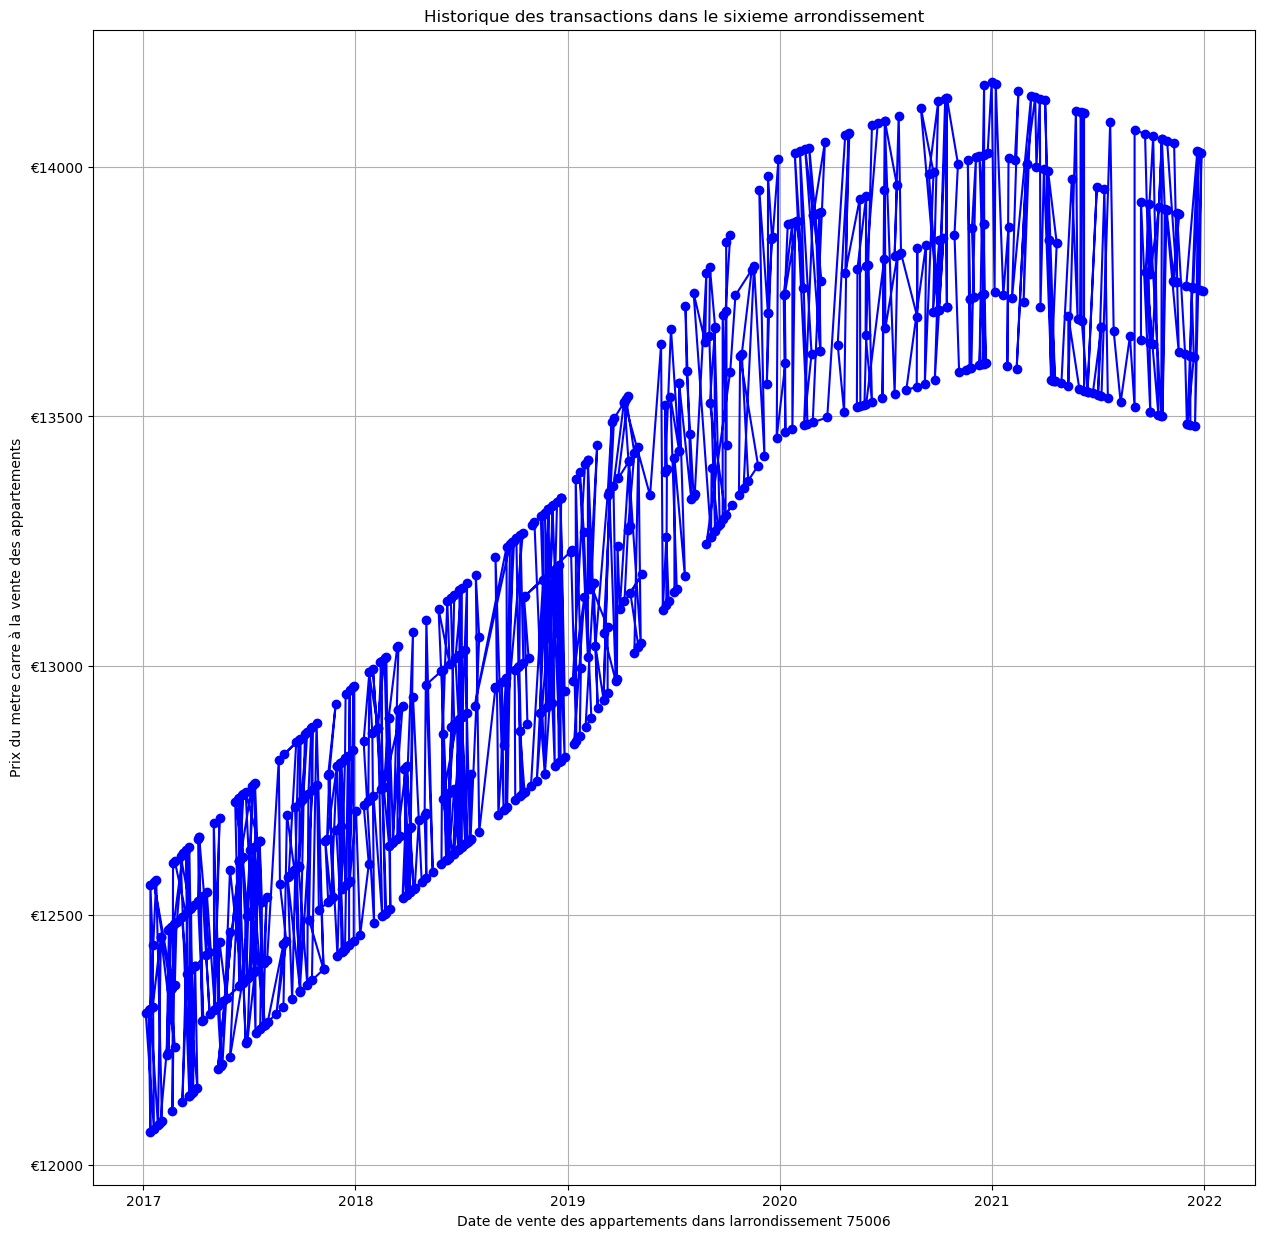

In [31]:
cp=75006
plt.figure(figsize=(15,15))

#Insérer ci-dessous le scatter plot plt.ylim(0,1)

plt.plot(df_arrondissement6['date_mutation'], df_arrondissement6['prix_par_metre_carre'], marker='o', c='b', label='Prix au mètre carré')

plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

On observe une evolution linéraire des prix de ventes des appartement dans le 6e jusqu'à 2020 et ensuite legère baisse

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [32]:
df_arrondissement6['date_mutation_2'] = pd.to_datetime(df_arrondissement6['date_mutation']).dt.strftime('%Y-%m-%d')

C:\Users\33666\AppData\Local\Temp\ipykernel_123808\1571178692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arrondissement6['date_mutation_2'] = pd.to_datetime(df_arrondissement6['date_mutation']).dt.strftime('%Y-%m-%d')


In [33]:
#On calcule la corrélation de Spearman

from scipy.stats import spearmanr
# Calcul de la corrélation de Spearman
 
correlation, p_value = spearmanr(df_arrondissement6['date_mutation_2'], df_arrondissement6['prix_par_metre_carre'])
# Affichage de la corrélation
print(f"Corrélation de Spearman : {correlation}")

# Affichage de la p-value
print(f"Valeur p : {p_value}")

Corrélation de Spearman : 0.914844977318667
Valeur p : 1.1999820574654143e-280


Le coefficient de corrélation est de 0.914 avec une pvalue de 1.1999820574654143e-280 donc il y a une forte corrélation positive entre les deux variables variables. Car plus la valeur est proche de 1, plus la corrélation est forte et positive.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [34]:
# Calcul de la corrélation de Spearman
correlation, p_value = spearmanr(df_arrondissement6['valeur_fonciere'], df_arrondissement6['surface_reelle'])

# Affichage de la corrélation
print(f"Corrélation de Spearman : {correlation}")

# Affichage de la p-value
print(f"Valeur p : {p_value}")

Corrélation de Spearman : 0.9977685406899678
Valeur p : 0.0


Le coefficient de corrélation est de 0.997 avec une pvalue de 0.0 cela suggère qu'il y a une forte corrélation positive entre les deux variables (valeur foncière et surface)

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [35]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_locaux_industriels = df_hist_immo_ss[df_hist_immo_ss['type_local'] == 'Local industriel. commercial ou assimilé']
df_locaux_industriels.head()



,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_par_metre_carre
18,2017-02-01,3.113277e+06,75003,Local industriel. commercial ou assimilé,250,12453.109192
29,2017-02-17,1.164375e+06,75003,Local industriel. commercial ou assimilé,95,12256.581685
34,2017-02-20,3.802522e+05,75003,Local industriel. commercial ou assimilé,31,12266.199603
91,2017-03-09,3.623842e+05,75001,Local industriel. commercial ou assimilé,29,12496.006027
109,2017-03-29,3.159072e+05,75003,Local industriel. commercial ou assimilé,25,12636.289027


In [36]:
df_locaux_industriels['annee'] = df_locaux_industriels['date_mutation'].dt.year
df_locaux_industriels.head()

C:\Users\33666\AppData\Local\Temp\ipykernel_123808\638733865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_locaux_industriels['annee'] = df_locaux_industriels['date_mutation'].dt.year


,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_par_metre_carre,annee
18,2017-02-01,3.113277e+06,75003,Local industriel. commercial ou assimilé,250,12453.109192,2017
29,2017-02-17,1.164375e+06,75003,Local industriel. commercial ou assimilé,95,12256.581685,2017
34,2017-02-20,3.802522e+05,75003,Local industriel. commercial ou assimilé,31,12266.199603,2017
91,2017-03-09,3.623842e+05,75001,Local industriel. commercial ou assimilé,29,12496.006027,2017
109,2017-03-29,3.159072e+05,75003,Local industriel. commercial ou assimilé,25,12636.289027,2017


In [37]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année

df_locaux_commerciaux = df_locaux_industriels.groupby('annee').agg({'prix_par_metre_carre': 'mean'})

print(df_locaux_commerciaux)

       prix_par_metre_carre
annee                      
2017           10949.909217
2018           11569.499180
2019           11960.132050
2020           11966.470204
2021           12006.488691


In [38]:
# Renommez les colonnes pour plus de clarté
df_locaux_commerciaux = df_locaux_commerciaux.rename(columns={'prix_par_metre_carre': 'prix_moyen'})
# Réinitialisez l'index
df_locaux_commerciaux = df_locaux_commerciaux.reset_index()

# Affichez le DataFrame résultant
print(df_locaux_commerciaux)

   annee    prix_moyen
0   2017  10949.909217
1   2018  11569.499180
2   2019  11960.132050
3   2020  11966.470204
4   2021  12006.488691


In [39]:
print(df_locaux_commerciaux.columns)


Index(['annee', 'prix_moyen'], dtype='object')


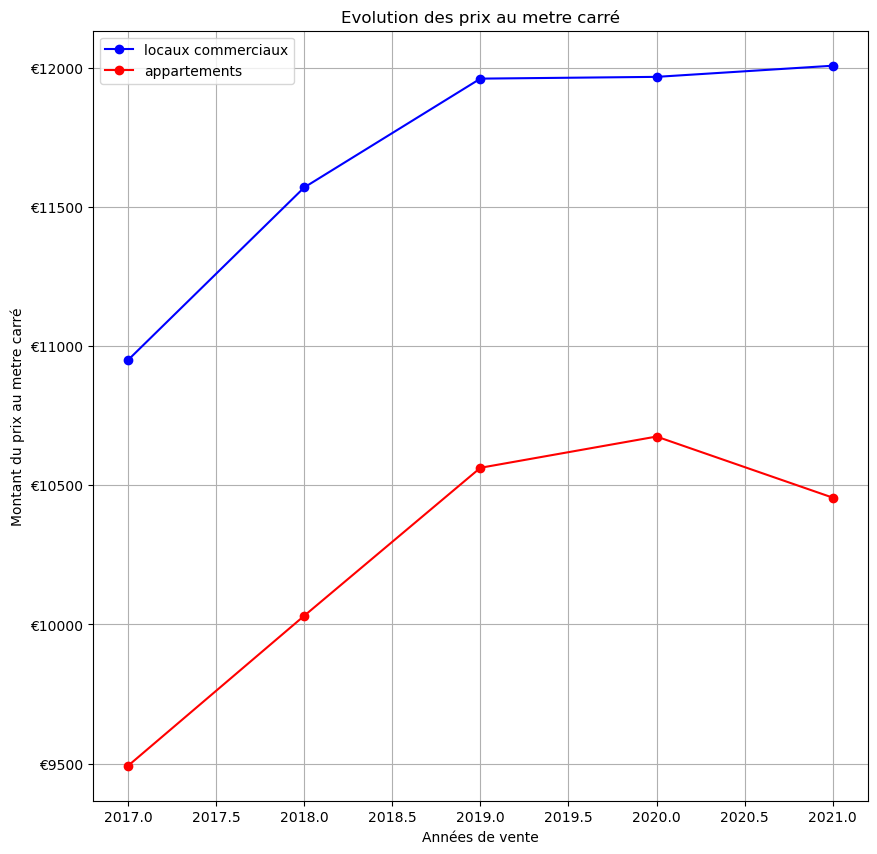

In [40]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
#plt.plot(['2017','2018','2019','2020','2021'],label='locaux commerciaux',color='blue')

plt.plot(df_locaux_commerciaux['annee'], df_locaux_commerciaux['prix_moyen'], marker='o', linestyle='-', label='locaux commerciaux', color='blue')

plt.plot(resultats ['annee'], resultats ['prix_moyen'], marker='o', linestyle='-', label='appartements',color='red')

plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré')
plt.savefig('mon_graphique.png')
plt.show()


Le prix au metre carré des locaux commerciaux est entre 10 950 et 12 000€ alors que pour les appartements c'est entre 9500 et 10500€

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrainer un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [41]:
# Utilisez get_dummies pour effectuer le one-hot encoding
df_hist_immo_encoded = pd.get_dummies(df_hist_immo, columns=['code_postal', 'type_local'])
df_hist_immo_encoded['timestamp']=df_hist_immo_encoded['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9
df_hist_immo_encoded.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,nom_commune,code_type_local,surface_reelle,prix_par_metre_carre,code_postal_75001,code_postal_75002,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,timestamp
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,Paris 3e Arrondissement,2,50,11011.193562,0,0,...,0,0,0,0,0,0,0,1,0,1.483402e+09
1,2017-01-12,1.576492e+06,32,AV MARCEAU,Paris 8e Arrondissement,2,163,9671.732877,0,0,...,0,0,0,0,0,0,0,1,0,1.484179e+09
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,Paris 8e Arrondissement,2,66,9966.020548,0,0,...,0,0,0,0,0,0,0,1,0,1.484006e+09
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,Paris 3e Arrondissement,2,22,11367.582877,0,0,...,0,0,0,0,0,0,0,1,0,1.484006e+09
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,Paris 1er Arrondissement,2,15,11751.113836,1,0,...,0,0,0,0,0,0,0,1,0,1.484266e+09


In [42]:
# suppression de colonnes inutiles
df_hist_immo_encod=df_hist_immo_encoded.drop(['date_mutation', 'adresse_numero', 'adresse_nom_voie' ,'nom_commune', 'code_type_local', 'prix_par_metre_carre'],axis=1)
df_hist_immo_encod.head()

,valeur_fonciere,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,timestamp
0,5.505597e+05,50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.483402e+09
1,1.576492e+06,163,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1.484179e+09
2,6.577574e+05,66,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1.484006e+09
3,2.500868e+05,22,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484006e+09
4,1.762667e+05,15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484266e+09


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [43]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split
# La valeur y à trouver est la valeur foncière
X = df_hist_immo_encod.drop(['valeur_fonciere'], axis=1)
y = df_hist_immo_encod['valeur_fonciere']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  random_state=13)
print('Train_set:',X_train.shape)
print('Test_set:',X_test.shape)

Train_set: (17551, 24)
Test_set: (8645, 24)


In [44]:
#conversion des données en str
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [45]:
from sklearn.linear_model import LinearRegression
#On entraîne l'algorithme ci-dessous
regressionlineaire=LinearRegression()
# Entraînez le modèle sur les données d'entraînement
regressionlineaire.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred = regressionlineaire.predict(X_test)
y_pred

array([276241.58136238, 244038.82703426, 402363.84840565, ...,
       292783.38397212, 153828.28139456, 963130.07629008])

In [47]:
# Affichez le pourcentage moyen d'erreur
erreur = (np.mean(abs(y_test-y_pred)/y_test))*100

erreur

8.804969802667202

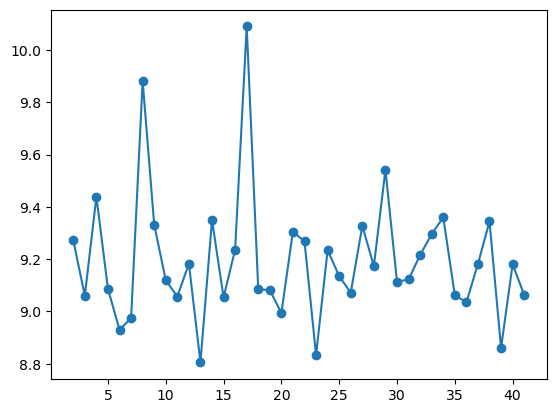

In [191]:
### choix de la valeur pour initialiser le générateur de nombres aléatoires(choix du random_state)
erreur = []

for k in range(2,42):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  random_state=k)

    X_train.columns = X_train.columns.astype(str)

    X_test.columns = X_test.columns.astype(str)

    regressionlineaire=LinearRegression().fit(X_train,y_train)

    y_pred = regressionlineaire.predict(X_test)

    erreur.append((np.mean(abs(y_test-y_pred)/y_test))*100)
                 

plt.plot(range(2,42), erreur, 'o-')

plt.show()


In [48]:
y_test [3]

250086.823287671

Notre algorithme fait donc 8.80 % d'erreur en moyenne sur la prédiction de la valeur foncière. Cela peut-être considéré comme un bon resultat car inférieur à 10%. Dans le cas de la prédiction des valeurs immobilière ça peut-être acceptable mais dans le cas des spéculations immobilières cela pourrait entrainer des pertes significatives.
Pour une bonne prédiction nous devons nous assurer d’utiliser les bonnes variables.  D'autres variables potentiellement pertinentes pourraient être explorer pour améliorer la performance du modèle, comme par exemples les taux d’emprunts….
Il faut noter que la valeur pour initialiser le générateur de nombres aléatoires peut affecter la manière dont les données sont divisées en ensembles d'entraînement et de test, c’est pourquoi nous avons tester plusieurs valeurs pour en retenir le chiffre 13, qui donnait l’un des taux d’erreur les plus faibles.
Par ailleurs, nous avons fait une prediction sur une surface de 15m2 de 2017 à 2032 des données de test.
La prédiction depend aussi du modèle utilisé, ici nous avons privilégié une regression linéraire.On aurait pu utiliser d'autres modèles(d'autres regressions plus complexes telle que la regression polynomiale ou des arbres de décisions)

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [49]:
#On importe les données dans un dataframe

## Importation du fichier portefeuille_actifs.xlsx
df_portefeuille_actifs = pd.read_excel("portefeuille_actifs+(3) (1).xlsx")
# Afficher les premières lignes du DataFrame
df_portefeuille_actifs.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


In [50]:
#On vérifie que le type des données attribué par pandas est cohérent
type_donnees_portefeuille_actifs=df_portefeuille_actifs.dtypes
print(type_donnees_portefeuille_actifs)

adresse_numero                 int64
adresse_nom_voie              object
code_postal                    int64
code_commune                   int64
nom_commune                   object
surface_carrez               float64
code_type_local                int64
type_local                    object
surface_reelle_bati            int64
nombre_pieces_principales      int64
longitude                    float64
latitude                     float64
dtype: object


#typologie des données portefeuille_actifs cohérent

In [51]:
##  verifier s'il ya des données manquantes
df_portefeuille_actifs.isnull().sum()

adresse_numero               0
adresse_nom_voie             0
code_postal                  0
code_commune                 0
nom_commune                  0
surface_carrez               0
code_type_local              0
type_local                   0
surface_reelle_bati          0
nombre_pieces_principales    0
longitude                    0
latitude                     0
dtype: int64

In [52]:
valeurs_uniques = df_portefeuille_actifs['type_local'].unique().tolist()
print('la liste des différents types de biens immobiliers que nous avons dans les données est ?:')
for valeur in valeurs_uniques:
    print(valeur)

la liste des différents types de biens immobiliers que nous avons dans les données est ?:
Appartement
Local industriel. commercial ou assimilé


In [53]:
valeurs_uniques_2 = df_portefeuille_actifs['code_type_local'].unique().tolist()
print('la liste des différents codes types de biens immobiliers du client que nous avons dans les données est ?:')
for valeur_2 in valeurs_uniques_2:
    print(valeur_2)

la liste des différents codes types de biens immobiliers du client que nous avons dans les données est ?:
2
4


On observe qu'il y a 2 types de biens, et que leurs codes types sont 2 et 4

In [54]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
nombre_transactions = df_portefeuille_actifs.shape[0]

# Filtrer les données pour un type de local spécifique, 
appartements = df_portefeuille_actifs[df_portefeuille_actifs['type_local'] == 'Appartement']
# Compter le nombre de transactions pour les appartements
nombre_transactions_appartements = appartements.shape[0]

# Filtrer les données pour un type de local spécifique,
locaux_industriels = df_portefeuille_actifs[df_portefeuille_actifs['type_local'] == 'Local industriel. commercial ou assimilé']
# Compter le nombre de transactions pour les locaux commerciaux
nombre_transactions_locaux_industriels = locaux_industriels.shape[0]

print("Nombre total de transactions client_les_plus_beaux_logis_de_Paris : ", nombre_transactions)
print("Nombre total de transactions d'appartements : ", nombre_transactions_appartements)
print("Nombre total de transactions de locaux commerciaux : ", nombre_transactions_locaux_industriels)

Nombre total de transactions client_les_plus_beaux_logis_de_Paris :  275
Nombre total de transactions d'appartements :  154
Nombre total de transactions de locaux commerciaux :  121


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [55]:
print(df_portefeuille_actifs.columns)

Index(['adresse_numero', 'adresse_nom_voie', 'code_postal', 'code_commune',
       'nom_commune', 'surface_carrez', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales', 'longitude',
       'latitude'],
      dtype='object')


In [56]:
#On retire les colonnes qui sont à priori inutiles 

df_portefeuille_actifs = df_portefeuille_actifs.drop(['adresse_numero', 'adresse_nom_voie', 'code_commune', 'nom_commune', 'surface_carrez', 'code_type_local', 'nombre_pieces_principales', 'longitude', 'latitude'], axis=1)
df_portefeuille_actifs.head()

,code_postal,type_local,surface_reelle_bati
0,75001,Appartement,25
1,75003,Appartement,22
2,75003,Appartement,65
3,75008,Appartement,74
4,75008,Appartement,22


In [57]:
#rennomer la colonne surface_reelle_bati
df_portefeuille_actifs.rename(columns={'surface_reelle_bati':'surface_reelle'}, inplace=True)
df_portefeuille_actifs.head()


,code_postal,type_local,surface_reelle
0,75001,Appartement,25
1,75003,Appartement,22
2,75003,Appartement,65
3,75008,Appartement,74
4,75008,Appartement,22


In [58]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
df_portefeuille_actifs_encoded = pd.get_dummies(df_portefeuille_actifs, columns=['code_postal', 'type_local'])
df_portefeuille_actifs_encoded.head()

,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [59]:
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt

## Créez une nouvelle colonne "timestamp" avec la date du 31 décembre 2022
df_portefeuille_actifs_encoded['timestamp']=int(dt.datetime(2022, 12, 31).timestamp())

## Affichez les premières lignes du DataFrame avec la nouvelle colonne "timestamp"
df_portefeuille_actifs_encoded.head()

,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,timestamp
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1672441200
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1672441200


In [60]:
#Conversion du dataframe en str
df_portefeuille_actifs_encoded.columns = df_portefeuille_actifs_encoded.columns.astype(str)

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [61]:
#On effectue la prédiction
y_pred_client=regressionlineaire.predict(df_portefeuille_actifs_encoded)
#On vérifie les 10 premières valeurs
y_pred_client[:10]

array([434365.41403468, 373484.87850928, 818595.34644907, 874760.69357513,
       336487.56955492, 471055.85055997, 394187.6909716 , 640377.98067286,
       152273.66956476, 149993.07951641])

In [62]:
#prediction des valeurs foncière du portefeuille client
X_client = df_portefeuille_actifs_encoded
y_pred_client_df = pd.DataFrame(y_pred_client)
result = pd.concat([X_client, y_pred_client_df], axis=1)
result = result.rename(columns={0: 'valeur_fonciere_predite'})
result.head(10)

,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,timestamp,valeur_fonciere_predite
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,434365.414035
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,373484.878509
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,818595.346449
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1672441200,874760.693575
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1672441200,336487.569555
5,35,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1672441200,471055.850560
6,24,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,394187.690972
7,60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,640377.980673
8,11,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1672441200,152273.669565
9,13,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1672441200,149993.079516


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [63]:
#Valorisation du portefeuille sur le segment des particuliers
print('la valorisation du segment particulier est (en millions deuros):')
result.loc[result['type_local_Appartement'] == 1]['valeur_fonciere_predite'].sum()/1000000

la valorisation du segment particulier est (en millions deuros):


71.33675095657905

In [64]:
#Valorisation du portefeuille sur le segment corporate
print('la valorisation du segment corporate est (en millions deuros):')
result.loc[result['type_local_Local industriel. commercial ou assimilé'] == 1]['valeur_fonciere_predite'].sum()/1000000

la valorisation du segment corporate est (en millions deuros):


98.502128314263

Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
-En fin 2022 le segment corporate aura une valorisation bien supérieure à celle du segment particulier,98 millions pour le 1er contre 71 millions pour le second.
Limites: L'evolution n'est pas forcement linéaire sur l'ensemble des données historiques. 
L'évolution de la courbe a eu une inflexion entre 2020 et 2021) alors que l'hypothèse surlequel on a travaillé était que l'evolution est linéraire à tout temps.
Avec l'erreur de 8.80% en moyenne , on peut considérer que les valeurs peuvent augmenter ou diminuer d'environ 8.80%.
Par ailleurs l'année 2021 etant une année atypique on pourrait eventuellement faire l'analyse en excluant les donnéees de cette année.


# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [65]:
## Importation du fichier echantillon_a_classer2 (1).xlsx
df_echantillon = pd.read_excel("echantillon_a_classer2.xlsx")
# Afficher les premières lignes du DataFrame
df_echantillon.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


In [66]:
#On vérifie que le type des données attribué par pandas est cohérent
type_donnees_echantillon=df_echantillon.dtypes
print(type_donnees_echantillon)

valeur_fonciere    float64
code_postal          int64
nom_commune         object
surface_reelle       int64
dtype: object


In [ ]:
#typologie des données echantillon coherent

In [67]:
##  verifier s'il ya des données manquantes
df_echantillon.isnull().sum()

valeur_fonciere    0
code_postal        0
nom_commune        0
surface_reelle     0
dtype: int64

On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [68]:

## Créer une nouvelle colonne "prix_par_metre_carre"
df_echantillon['prix_par_metre_carre'] = df_echantillon['valeur_fonciere'] / df_echantillon['surface_reelle']

# Afficher le DataFrame avec la nouvelle colonne
df_echantillon.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle,prix_par_metre_carre
0,868687.083271,75019,Paris 19e Arrondissement,88,9871.444128
1,452050.762192,75019,Paris 19e Arrondissement,45,10045.572493
2,193088.653587,75019,Paris 19e Arrondissement,21,9194.697790
3,303012.549370,75019,Paris 19e Arrondissement,32,9469.142168
4,149272.200110,75019,Paris 19e Arrondissement,20,7463.610005


In [69]:
#On retire les colonnes dont nous avons deja l'information(valeur_foncière,code_postale,nom_commune,surface) 
df_echantillon = df_echantillon.drop(['valeur_fonciere', 'code_postal', 'nom_commune', 'surface_reelle'], axis=1)
df_echantillon.head()


,prix_par_metre_carre
0,9871.444128
1,10045.572493
2,9194.697790
3,9469.142168
4,7463.610005


In [70]:
# Tri dans l'ordre décroissant
df_echantillon = df_echantillon.sort_values(by='prix_par_metre_carre')
print(df_echantillon)

    prix_par_metre_carre
21           7207.217630
12           7238.422973
35           7239.983240
34           7294.202055
19           7296.900510
25           7306.810274
15           7313.114384
20           7322.570548
14           7343.539315
7            7348.917415
24           7399.266027
16           7415.564351
23           7437.880186
4            7463.610005
10           7490.469041
33           7577.044521
37           7583.980837
29           7613.514621
9            7616.420959
31           7666.071700
2            9194.697790
3            9469.142168
11           9518.076103
28           9597.631488
6            9674.262777
36           9715.531658
30           9734.720495
39           9771.486096
8            9789.051438
22           9815.972258
13           9869.462342
0            9871.444128
17           9949.544452
26           9961.146860
18           9978.784822
5            9982.016919
38           9983.591800
1           10045.572493
27          10103.161577


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [71]:
from sklearn.cluster import KMeans


In [72]:
model = KMeans(n_clusters=2).fit_predict(df_echantillon)

C:\Users\33666\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\33666\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [73]:
df_echantillon['model'] = model
df_echantillon

,prix_par_metre_carre,model
21,7207.217630,1
12,7238.422973,1
35,7239.983240,1
34,7294.202055,1
19,7296.900510,1
25,7306.810274,1
15,7313.114384,1
20,7322.570548,1
14,7343.539315,1
7,7348.917415,1


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [74]:
#On affiche les résultats
## Remplacez les 1 par "Appartement" et les 0 par "Local industriel" dans la colonne "model"
df_echantillon['model'] = df_echantillon['model'].replace({1: 'Appartement', 0: 'Local industriel. commercial ou assimilé'})

## Affichage du DataFrame modifié
print(df_echantillon)

    prix_par_metre_carre                                     model
21           7207.217630                               Appartement
12           7238.422973                               Appartement
35           7239.983240                               Appartement
34           7294.202055                               Appartement
19           7296.900510                               Appartement
25           7306.810274                               Appartement
15           7313.114384                               Appartement
20           7322.570548                               Appartement
14           7343.539315                               Appartement
7            7348.917415                               Appartement
24           7399.266027                               Appartement
16           7415.564351                               Appartement
23           7437.880186                               Appartement
4            7463.610005                               Apparte

# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :

-Nous avons constaté une evolution des prix au fil des années sur l'ensemble des 20 arrondissements de paris avec une inflexion en 2020.
-Nous avons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. 
-Le coefficient de corrélation de spearmanr calculé nous fait comprendre que le temps a une influence sur le prix , la valeur foncière est tributaire également de la surface.
-Ensuite nous avons entrainé un algorithme de regression linéraire sur les données historique ,ce qui nous a permis de predire la valorisation future du portefeuille actif du client et de constater que le segment corporate aura une plus-value supérieur au segment particulier.

Limites: L'evolution n'est pas forcement linéaire sur l'ensemble des données historiques. 
L'évolution de la courbe a eu une inflexion entre 2020 et 2021) alors que l'hypothèse surlequel on a travaillé était que l'evolution est linéraire à tout temps.
Avec l'erreur de 8.80% en moyenne , on peut considérer que les valeurs peuvent augmenter ou diminuer d'environ 8.80%.
Vu que l'année 2020 a été une année marqué par le covid et les années qui suivront par les guerres, l'inflation.Ces années atypiques modifieront probablement la courbe.
